In [1]:
import pandas as pd
import numpy as np
import scipy.stats as scipy
import matplotlib.pyplot as plt
import requests #download from football data
import io 
from __future__ import division
import seaborn as sns
%matplotlib inline

### Load the data

In [2]:
url = "http://www.football-data.co.uk/mmz4281/1718/E0.csv"

In [3]:
testfile = requests.get(url).content
df=pd.read_csv(io.StringIO(testfile.decode('utf-8')))
df.to_csv("./Data/England/E0_17.csv")

In [4]:
df = pd.read_csv("./Data/England/E0_17.csv")

In [5]:
df.columns

Index([u'Unnamed: 0', u'Div', u'Date', u'HomeTeam', u'AwayTeam', u'FTHG',
       u'FTAG', u'FTR', u'HTHG', u'HTAG', u'HTR', u'Referee', u'HS', u'AS',
       u'HST', u'AST', u'HF', u'AF', u'HC', u'AC', u'HY', u'AY', u'HR', u'AR',
       u'B365H', u'B365D', u'B365A', u'BWH', u'BWD', u'BWA', u'IWH', u'IWD',
       u'IWA', u'LBH', u'LBD', u'LBA', u'PSH', u'PSD', u'PSA', u'WHH', u'WHD',
       u'WHA', u'VCH', u'VCD', u'VCA', u'Bb1X2', u'BbMxH', u'BbAvH', u'BbMxD',
       u'BbAvD', u'BbMxA', u'BbAvA', u'BbOU', u'BbMx>2.5', u'BbAv>2.5',
       u'BbMx<2.5', u'BbAv<2.5', u'BbAH', u'BbAHh', u'BbMxAHH', u'BbAvAHH',
       u'BbMxAHA', u'BbAvAHA', u'PSCH', u'PSCD', u'PSCA', u'Unnamed: 65',
       u'Unnamed: 66', u'Unnamed: 67'],
      dtype='object')

In [6]:
df

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,0,E0,11/08/17,Arsenal,Leicester,4,3,H,2,2,...,1.91,1.85,2.10,2.02,1.49,4.73,7.25,NaN,NaN,NaN
1,1,E0,12/08/17,Brighton,Man City,0,2,A,0,0,...,1.95,1.91,2.01,1.96,11.75,6.15,1.29,NaN,NaN,NaN
2,2,E0,12/08/17,Chelsea,Burnley,2,3,A,0,3,...,2.03,1.97,1.95,1.90,1.33,5.40,12.25,NaN,NaN,NaN
3,3,E0,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,...,2.10,2.05,1.86,1.83,1.79,3.56,5.51,NaN,NaN,NaN
4,4,E0,12/08/17,Everton,Stoke,1,0,H,1,0,...,1.94,1.90,2.01,1.98,1.82,3.49,5.42,NaN,NaN,NaN
5,5,E0,12/08/17,Southampton,Swansea,0,0,D,0,0,...,1.83,1.78,2.16,2.10,1.56,4.25,6.85,NaN,NaN,NaN
6,6,E0,12/08/17,Watford,Liverpool,3,3,D,2,1,...,1.90,1.84,2.13,2.04,6.88,4.27,1.56,NaN,NaN,NaN
7,7,E0,12/08/17,West Brom,Bournemouth,1,0,H,1,0,...,2.12,2.08,1.85,1.81,2.65,3.21,3.02,NaN,NaN,NaN
8,8,E0,13/08/17,Man United,West Ham,4,0,H,1,0,...,2.01,1.96,1.95,1.92,1.31,5.79,12.01,NaN,NaN,NaN
9,9,E0,13/08/17,Newcastle,Tottenham,0,2,A,0,0,...,2.06,2.00,1.92,1.87,4.82,3.90,1.80,NaN,NaN,NaN


### Cleaning and subsetting required data

Remove betting data as we don't need it for prediction. However, they could be good indicators of a team's current form - should try it out later.

In [7]:
res_16 = df.ix[:,:23]
res_16 = res_16.drop(['Div','Date'],axis=1)
# res_14 = df_14.ix[:,:23]
# res_14 = res_14.drop(['Div','Date'],axis=1)
table_features = df.ix[:,:7]
table_features = table_features.drop(['FTHG','FTAG','Div','Date'],axis=1)
bet_16 = df.ix[:,23:]

/home/sibi/tools/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [8]:
res_16.head()
feature_table = df.ix[:,:23]

In [9]:
res_16.tail()

,Unnamed: 0,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR
175,175,Stoke,West Ham,0,3,A,0,1,A,G Scott,...,14,0,7,12,13,7,9,2,1,0
176,176,Watford,Huddersfield,1,4,A,0,2,A,M Oliver,...,15,3,9,12,17,8,7,2,1,1
177,177,Bournemouth,Liverpool,0,4,A,0,3,A,A Marriner,...,21,2,7,5,10,2,3,1,1,0
178,178,West Brom,Man United,1,2,A,0,2,A,A Taylor,...,8,5,3,14,7,6,3,1,3,0
179,179,Everton,Swansea,3,1,H,1,1,D,J Moss,...,8,7,3,12,12,6,3,2,3,0


In [10]:
#Team, Home Goals Score, Away Goals Score, Attack Strength, Home Goals Conceded, Away Goals Conceded, Defensive Strength
table_16 = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS',))
table_16 = table_16[:-10]

In [11]:
res_16 = res_16[:-10]
res_16.shape[0]

170

In [12]:
avg_home_scored_16 = res_16.FTHG.sum()*1.0 / res_16.shape[0]
avg_away_scored_16 = res_16.FTAG.sum()*1.0 / res_16.shape[0]
avg_home_conceded_16 = avg_away_scored_16
avg_away_conceded_16 = avg_home_scored_16
print("Average number of goals at home",avg_home_scored_16)
print("Average number of goals away", avg_away_scored_16)
print("Average number of goals conceded at home",avg_home_conceded_16)
print("Average number of goals conceded away",avg_away_conceded_16)

('Average number of goals at home', 1.4529411764705882)
('Average number of goals away', 1.1588235294117648)
('Average number of goals conceded at home', 1.1588235294117648)
('Average number of goals conceded away', 1.4529411764705882)


In [13]:
res_home = res_16.groupby('HomeTeam')
res_away = res_16.groupby('AwayTeam')

In [14]:
# list(res_home)[0]

In [15]:
table_16.Team = res_home.HomeTeam.all().values
table_16.HGS = res_home.FTHG.sum().values
table_16.HGC = res_home.FTAG.sum().values
table_16.AGS = res_away.FTAG.sum().values
table_16.AGC = res_away.FTHG.sum().values

In [16]:
#Assuming number of home games = number of away games
num_games = res_16.shape[0]/20

In [17]:
table_16.HAS = (table_16.HGS / num_games) / avg_home_scored_16
table_16.AAS = (table_16.AGS / num_games) / avg_away_scored_16
table_16.HDS = (table_16.HGC / num_games) / avg_home_conceded_16
table_16.ADS = (table_16.AGC / num_games) / avg_away_conceded_16
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,21,9,1.700405,0.913706,7,13,0.710660,1.052632
1,Bournemouth,9,6,0.728745,0.609137,9,11,0.913706,0.890688
2,Brighton,9,5,0.728745,0.507614,12,11,1.218274,0.890688
3,Burnley,7,9,0.566802,0.913706,3,9,0.304569,0.728745
4,Chelsea,13,18,1.052632,1.827411,7,7,0.710660,0.566802
5,Crystal Palace,12,0,0.971660,0.000000,15,13,1.522843,1.052632
6,Everton,14,7,1.133603,0.710660,12,17,1.218274,1.376518
7,Huddersfield,9,3,0.728745,0.304569,11,18,1.116751,1.457490
8,Leicester,11,16,0.890688,1.624365,9,14,0.913706,1.133603
9,Liverpool,14,20,1.133603,2.030457,3,17,0.304569,1.376518


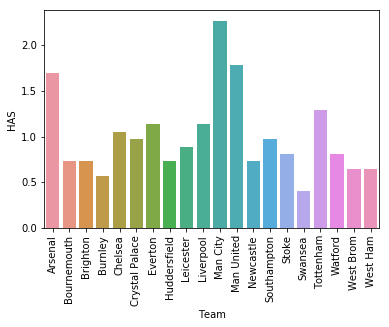

In [18]:
has_plot = sns.barplot(table_16.Team,table_16.HAS)
for item in has_plot.get_xticklabels():
    item.set_rotation(90)

In [19]:
table_16[table_16.Team == "Swansea"]

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
15,Swansea,5,4,0.404858,0.406091,14,8,1.42132,0.647773


In [20]:
''' feature_table contains all the fixtures in the current season.
ftr = full time result
hst = home shots on target
ast = away shots on target
'''

feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST']]
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['AwayTeam']]['ADS'].values[0])
    
feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS

In [21]:
feature_table.head(20)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS
0,Arsenal,Leicester,H,10,3,1.700405,0.710660,1.624365,1.133603
1,Brighton,Man City,A,2,4,0.728745,1.218274,2.436548,0.404858
2,Chelsea,Burnley,A,6,5,1.052632,0.710660,0.913706,0.728745
3,Crystal Palace,Huddersfield,A,4,6,0.971660,1.522843,0.304569,1.457490
4,Everton,Stoke,H,4,1,1.133603,1.218274,0.913706,1.700405
5,Southampton,Swansea,D,2,0,0.971660,1.421320,0.406091,0.647773
6,Watford,Liverpool,D,4,5,0.809717,1.624365,2.030457,1.376518
7,West Brom,Bournemouth,H,6,2,0.647773,1.218274,0.609137,0.890688
8,Man United,West Ham,H,6,1,1.781377,0.304569,0.609137,1.700405
9,Newcastle,Tottenham,A,3,6,0.728745,1.218274,1.421320,0.647773


In [22]:
def transformResult(row):
    '''Converts results (H,A or D) into numeric values'''
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [23]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)

In [24]:
feature_table = feature_table[:-10] #ONLY FOR WEEK 33. REMOVE FROM 34
feature_table.tail(10)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,Result
160,Burnley,Stoke,H,2,7,0.566802,0.304569,0.913706,1.700405,1
161,Crystal Palace,Watford,H,4,2,0.971660,1.522843,1.624365,1.052632,1
162,Huddersfield,Chelsea,A,2,5,0.728745,1.116751,1.827411,0.566802,-1
163,Liverpool,West Brom,D,5,1,1.133603,0.304569,0.406091,0.809717,0
164,Man United,Bournemouth,H,2,7,1.781377,0.304569,0.609137,0.890688,1
165,Newcastle,Everton,A,4,4,0.728745,1.218274,0.710660,1.376518,-1
166,Southampton,Leicester,A,4,11,0.971660,1.421320,1.624365,1.133603,-1
167,Swansea,Man City,A,3,10,0.404858,1.421320,2.436548,0.404858,-1
168,Tottenham,Brighton,H,8,4,1.295547,0.609137,0.507614,0.890688,1
169,West Ham,Arsenal,D,0,3,0.647773,1.116751,0.913706,1.052632,0


In [25]:
X_train = feature_table[['HST','AST','HAS','HDS','AAS','ADS',]]
y_train = feature_table['Result']

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import voting_classifier
from sklearn.svm import LinearSVC

/home/sibi/tools/miniconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
clf1 = RandomForestClassifier()
clf2 = MultinomialNB()
clf3 = XGBClassifier()
clf4 = LinearSVC()

In [28]:
y_pred = clf4.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[ 0.47368421  0.70588235  0.41176471  0.70588235  0.41176471  0.58823529
  0.64705882  0.76470588  0.5         0.5       ]
0.570897832817


In [29]:
y_pred = clf1.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[ 0.42105263  0.70588235  0.47058824  0.76470588  0.52941176  0.47058824
  0.52941176  0.58823529  0.5         0.375     ]
0.535487616099


In [30]:
y_pred = clf2.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf2, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[ 0.57894737  0.58823529  0.64705882  0.64705882  0.52941176  0.70588235
  0.64705882  0.64705882  0.625       0.5       ]
0.61157120743


In [31]:
y_pred = clf3.fit(X_train, y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf3, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[ 0.47368421  0.82352941  0.58823529  0.64705882  0.47058824  0.58823529
  0.58823529  0.64705882  0.4375      0.4375    ]
0.5701625387


## Adding Recent Performance

In [32]:
#What is this for???
ht = res_16.loc[40].HomeTeam
at = res_16.loc[40].AwayTeam

In [33]:
feat_table = res_16.sort_index(ascending=False)
feat_table = feat_table[['HomeTeam','AwayTeam','FTR','FTHG','FTAG','HS','AS','HC','AC']]

In [34]:
# Adding next week fixtures
new_fixtures = pd.DataFrame( [['Leicester','Man United','D',0,0,0,0,0,0],
                             ['Burnley','Tottenham','D',0,0,0,0,0,0],
                             ['Swansea','Crystal Palace','D',0,0,0,0,0,0],
                             ['West Ham','Newcastle','D',0,0,0,0,0,0],
                             ['Stoke','West Brom','D',0,0,0,0,0,0],
                             ['Southampton','Huddersfield','D',0,0,0,0,0,0],
                             ['Man City','Bournemouth','D',0,0,0,0,0,0],
                             ['Brighton','Watford','D',0,0,0,0,0,0],
                             ['Everton','Chelsea','D',0,0,0,0,0,0],
                             ['Arsenal','Liverpool','D',0,0,0,0,0,0]],columns=feat_table.columns)

In [35]:
new_feat_table = new_fixtures.append(feat_table,ignore_index=True)
new_feat_table = new_feat_table.sort_index(ascending=False)
new_feat_table = new_feat_table.reset_index().drop(['index'], axis=1)
new_feat_table = new_feat_table.sort_index(ascending=False)
# feat_table = n
feat_table = new_feat_table
feat_table.shape

(180, 9)

In [36]:
#Adding k recent performance measures
feat_table["pastHS"] = 0.0
feat_table["pastHC"] = 0.0
feat_table["pastAS"] = 0.0
feat_table["pastAC"] = 0.0
feat_table["pastHG"] = 0.0
feat_table["pastAG"] = 0.0

In [37]:
feat_table.head(12)

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG
179,Leicester,Man United,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
178,Burnley,Tottenham,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
177,Swansea,Crystal Palace,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
176,West Ham,Newcastle,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
175,Stoke,West Brom,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
174,Southampton,Huddersfield,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
173,Man City,Bournemouth,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
172,Brighton,Watford,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
171,Everton,Chelsea,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
170,Arsenal,Liverpool,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# for index,row in feat_table.iterrows():
#     #print row['HomeTeam'], table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values

In [108]:
# Adding k recent performance metrics. Change value of k.
k = 3
for i in range(feat_table.shape[0]-1,-1,-1):
    row = feat_table.loc[i]
    ht = row.HomeTeam
    at = row.AwayTeam
    ht_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == ht) | (feat_table.AwayTeam == ht)].head(k)
    at_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == at) | (feat_table.AwayTeam == at)].head(k)

    feat_table.set_value(i, 'pastHC', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HC + ht_stats[ht_stats["HomeTeam"] == ht].sum().HC)/k)
    feat_table.set_value(i, 'pastAC', (at_stats[at_stats["AwayTeam"] == at].sum().HC + at_stats[at_stats["HomeTeam"] == at].sum().HC)/k)
    feat_table.set_value(i, 'pastHS', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k)
    feat_table.set_value(i, 'pastAS', (at_stats[at_stats["AwayTeam"] == at].sum().HS + at_stats[at_stats["HomeTeam"] == at].sum().AS)/k)
    feat_table.set_value(i, 'pastHG', (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k)
    feat_table.set_value(i, 'pastAG', (at_stats[at_stats["AwayTeam"] == at].sum().FTAG + at_stats[at_stats["HomeTeam"] == at].sum().FTHG)/k)

f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feat_table.iterrows():
    #print row
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['HomeTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['HomeTeam']]['ADS'].values[0])
    
feat_table['HAS'] = f_HAS
feat_table['HDS'] = f_HDS
feat_table['AAS'] = f_AAS
feat_table['ADS'] = f_ADS

/home/sibi/tools/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/sibi/tools/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/sibi/tools/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/home/sibi/tools/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/home/sibi/tools/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in 

In [109]:
test_table = feat_table.drop(['FTHG','FTAG','HS','AS','HC','AC'],axis=1)

In [110]:
test_table["Result"] = test_table.apply(lambda row: transformResult(row),axis=1)
test_table.sort_index(inplace=True)

In [111]:
# num_games decides the train-test split
print(feat_table.shape)
num_games = feat_table.shape[0]-10
num_games

(180, 19)


170

In [112]:
X_train = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[0:num_games]
y_train = test_table['Result'].loc[0:num_games]
X_test = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[num_games:]
y_test = test_table['Result'].loc[num_games:]

In [113]:
### Try predictions here too.

# Adding home advantage

In [114]:
test_table["pastCornerDiff"] = (test_table["pastHC"] - test_table["pastAC"])/k
test_table["pastGoalDiff"] = (test_table["pastHG"] - test_table["pastAG"])/k
test_table["pastShotsDiff"] = (test_table["pastHS"] - test_table["pastAG"])/k

In [115]:
''' number of games to exclude in the training set for validation
For example, if 240 games have been played, test_table has 250 fixtures - the last 10 being the ones that haven't
been played. So, we set aside 20 fixtures from the training set containing 240 fixtures for validation.''' 
num_games = feat_table.shape[0]-10
print(num_games)
v_split = 15
n_games = num_games - v_split

170


In [116]:
test_table = test_table.fillna(0)

In [117]:
test_table.head()

,HomeTeam,AwayTeam,FTR,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG,HAS,HDS,AAS,ADS,Result,pastCornerDiff,pastGoalDiff,pastShotsDiff
0,Arsenal,Leicester,H,0.0,0.0,0.0,0.0,0.0,0.0,1.700405,0.710660,0.913706,1.052632,1,0.0,0.0,0.0
1,Brighton,Man City,A,0.0,0.0,0.0,0.0,0.0,0.0,0.728745,1.218274,0.507614,0.890688,-1,0.0,0.0,0.0
2,Chelsea,Burnley,A,0.0,0.0,0.0,0.0,0.0,0.0,1.052632,0.710660,1.827411,0.566802,-1,0.0,0.0,0.0
3,Crystal Palace,Huddersfield,A,0.0,0.0,0.0,0.0,0.0,0.0,0.971660,1.522843,0.000000,1.052632,-1,0.0,0.0,0.0
4,Everton,Stoke,H,0.0,0.0,0.0,0.0,0.0,0.0,1.133603,1.218274,0.710660,1.376518,1,0.0,0.0,0.0


In [118]:
test_table.drop(['pastHC','pastAS','pastAC','pastHG','pastAG'],axis=1)
X_train = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[0:n_games]
y_train = test_table['Result'].loc[0:n_games]
X_test = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[n_games:num_games-1]
y_test = test_table['Result'].loc[n_games:num_games-1]
X_predict = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[num_games:]

In [119]:
X_predict

,pastCornerDiff,pastGoalDiff,pastShotsDiff,HAS,HDS,AAS,ADS
170,-0.222222,-0.444444,1.555556,1.700405,0.710660,0.913706,1.052632
171,0.222222,-0.222222,4.222222,1.133603,1.218274,0.710660,1.376518
172,0.666667,-0.111111,6.000000,0.728745,1.218274,0.507614,0.890688
173,-0.111111,0.555556,2.111111,2.267206,0.609137,2.436548,0.404858
174,0.777778,0.000000,4.444444,0.971660,1.421320,0.507614,0.728745
175,0.666667,0.333333,4.444444,0.809717,1.522843,0.913706,1.700405
176,-0.666667,-0.111111,6.888889,0.647773,1.116751,0.609137,1.700405
177,-0.333333,-0.222222,4.000000,0.404858,1.421320,0.406091,0.647773
178,-1.111111,-0.666667,3.666667,0.566802,0.304569,0.913706,0.728745
179,0.777778,0.333333,3.444444,0.890688,0.913706,1.624365,1.133603


In [120]:
# clf1.fit(X_train,y_train)
# #clf2.fit(X_train,y_train)
# clf3.fit(X_train,y_train)
# clf4.fit(X_train,y_train)
# clf5.fit(X_train,y_train)
# clf6.fit(X_train,y_train)

In [121]:
#KNN
plot_scores_knn = []
for b in range(1,50):
    clf_knn = KNeighborsClassifier(n_neighbors=b)
    clf_knn.fit(X_train,y_train)
    scores = accuracy_score(y_test,clf_knn.predict(X_test))
    plot_scores_knn.append(scores)

#XGBClassifier
plot_scores_XGB = []
for i in range(1,100):
    clf_XGB = XGBClassifier(n_estimators=i,max_depth=100)
    clf_XGB.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_XGB.predict(X_test))
    plot_scores_XGB.append(scores)
    
#Logistic Regression
plot_scores_logreg= []
cs = [0.01,0.02,0.1,0.5,1,3,4,5,10]
for c in cs:
    clf_logreg = LogisticRegression(C=c,solver='lbfgs',multi_class='ovr')
    clf_logreg.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_logreg.predict(X_test))
    plot_scores_logreg.append(scores)


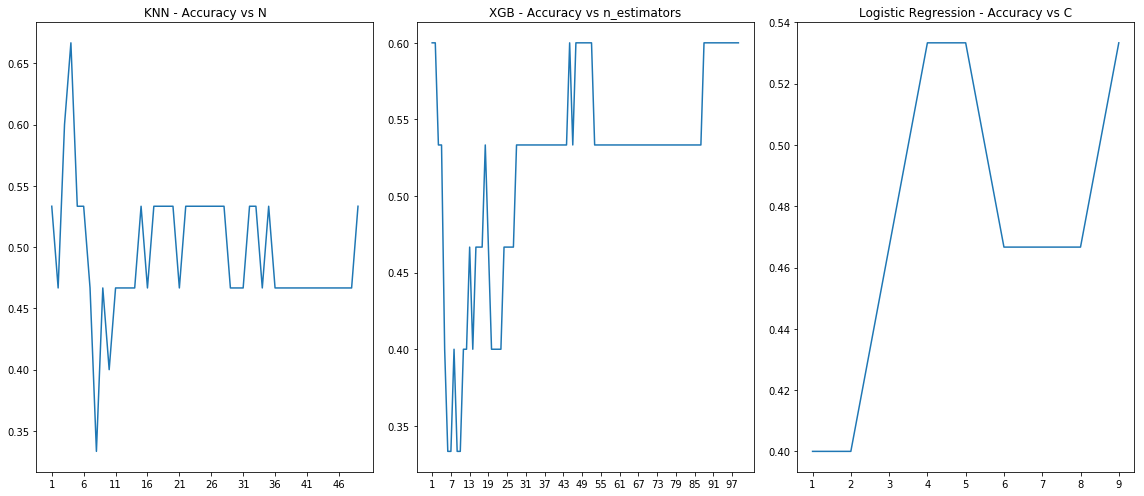

In [122]:
fig = plt.figure(figsize = (16,7))
# plt.style.use('ggplot')

ax1 = fig.add_subplot(1,3,1)
ax1.plot(range(1,50),plot_scores_knn);
ax1.set_title("KNN - Accuracy vs N")
ax1.set_xticks(range(1,50,5));

ax2 = fig.add_subplot(1,3,2)
ax2.plot(range(1,100),plot_scores_XGB);
ax2.set_xticks(range(1,100,6));
ax2.set_title("XGB - Accuracy vs n_estimators")

ax3 = fig.add_subplot(1,3,3)
ax3.plot(range(1,10),plot_scores_logreg);
ax3.set_xticks(range(1,10));
ax3.set_title("Logistic Regression - Accuracy vs C")

fig.tight_layout()

In [123]:
max_knn_n = max(plot_scores_knn)
max_knn_ind = plot_scores_knn.index(max_knn_n)

max_XGB_e = max(plot_scores_XGB)
max_XGB_ind = plot_scores_XGB.index(max_XGB_e) if plot_scores_XGB.index(max_XGB_e)!=0 else 1

max_logreg_c = max(plot_scores_logreg)
max_logreg_ind = plot_scores_logreg.index(max_logreg_c)

print(max_knn_n, max_knn_ind)
print(max_XGB_e, max_XGB_ind)
print(max_logreg_c, max_logreg_ind)

#max_knn_ind=15 
#max_XGB_ind=40
#max_logreg_ind=3



(0.66666666666666663, 3)
(0.59999999999999998, 1)
(0.53333333333333333, 3)


In [124]:
clf_knn = KNeighborsClassifier(n_neighbors=max_knn_ind).fit(X_train,y_train)
clf_XGB = XGBClassifier(n_estimators=max_XGB_ind).fit(X_train,y_train)
clf_logreg = LogisticRegression(C=max_logreg_ind,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)

In [125]:
y_pred_knn = clf_knn.predict(X_predict)
y_pred_XGB = clf_XGB.predict(X_predict)
y_pred_logreg = clf_logreg.predict(X_predict)

In [126]:
this_week = test_table[['HomeTeam','AwayTeam']].loc[num_games:]
this_week['Result_knn']=y_pred_knn
this_week['Result_XGB']=y_pred_XGB
this_week['Result_logreg']=y_pred_logreg

In [127]:
this_week

,HomeTeam,AwayTeam,Result_knn,Result_XGB,Result_logreg
170,Arsenal,Liverpool,1,1,1
171,Everton,Chelsea,-1,-1,1
172,Brighton,Watford,-1,0,0
173,Man City,Bournemouth,1,1,1
174,Southampton,Huddersfield,0,0,0
175,Stoke,West Brom,-1,1,1
176,West Ham,Newcastle,0,0,1
177,Swansea,Crystal Palace,0,0,-1
178,Burnley,Tottenham,1,-1,-1
179,Leicester,Man United,-1,1,1


In [128]:
def transformResultBack(row,col_name):
    if(row[col_name] == 1):
        return 'H'
    elif(row[col_name] == -1):
        return 'A'
    else:
        return 'D'

In [129]:
this_week["Res_knn"] = this_week.apply(lambda row: transformResultBack(row,"Result_knn"),axis=1)
this_week["Res_XGB"] = this_week.apply(lambda row: transformResultBack(row,"Result_XGB"),axis=1)
this_week["Res_logreg"] = this_week.apply(lambda row: transformResultBack(row,"Result_logreg"),axis=1)

this_week.drop(["Result_knn", "Result_XGB","Result_logreg"],axis=1,inplace=True)

In [130]:
print(max_knn_n, max_XGB_e, max_logreg_c)
this_week

(0.66666666666666663, 0.59999999999999998, 0.53333333333333333)


,HomeTeam,AwayTeam,Res_knn,Res_XGB,Res_logreg
170,Arsenal,Liverpool,H,H,H
171,Everton,Chelsea,A,A,H
172,Brighton,Watford,A,D,D
173,Man City,Bournemouth,H,H,H
174,Southampton,Huddersfield,D,D,D
175,Stoke,West Brom,A,H,H
176,West Ham,Newcastle,D,D,H
177,Swansea,Crystal Palace,D,D,A
178,Burnley,Tottenham,H,A,A
179,Leicester,Man United,A,H,H
